In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import seaborn as sns

import util

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [5]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.0,2.30,137,1,0,30,0
124,60.0,0,582,0,40,0,217000.0,3.70,134,1,0,96,1
280,70.0,0,2695,1,40,0,241000.0,1.00,137,1,0,247,0
148,75.0,1,582,0,30,0,225000.0,1.83,134,1,0,113,1
28,58.0,1,60,0,38,0,153000.0,5.80,134,1,0,26,1


# Create Model 

In [6]:
import models

# set initial bias
neg, pos = np.bincount(df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])


mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1, bias = initial_bias)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# Normalize Data

In [7]:
train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

test_y = test.pop('DEATH_EVENT')
test_x = util.norm(test)

# Train Model

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [9]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.370370,0.0,0.335928,1.0,0.242424,0.0,0.390431,0.202247,0.685714,1.0,0.0,0.092527
1,0.370370,0.0,0.071319,0.0,0.393939,0.0,0.267680,0.359551,0.600000,1.0,0.0,0.327402
2,0.555556,0.0,0.340903,1.0,0.393939,0.0,0.301158,0.056180,0.685714,1.0,0.0,0.864769
3,0.648148,1.0,0.071319,0.0,0.242424,0.0,0.278839,0.149438,0.600000,1.0,0.0,0.387900
4,0.333333,1.0,0.004721,0.0,0.363636,0.0,0.178407,0.595506,0.600000,1.0,0.0,0.078292


In [10]:
print(np.unique(train_y))

non_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2
    )

[0 1]
Train on 191 samples, validate on 48 samples
Epoch 1/100
191/191 [==============================] - 3s 14ms/sample - loss: 0.7049 - tp: 14.0000 - fp: 43.0000 - tn: 91.0000 - fn: 43.0000 - accuracy: 0.5497 - precision: 0.2456 - recall: 0.2456 - auc: 0.4685 - val_loss: 0.7396 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 20.0000 - val_accuracy: 0.5417 - val_precision: 0.3333 - val_recall: 0.0476 - val_auc: 0.4189
Epoch 2/100
191/191 [==============================] - 0s 361us/sample - loss: 0.6721 - tp: 16.0000 - fp: 32.0000 - tn: 102.0000 - fn: 41.0000 - accuracy: 0.6178 - precision: 0.3333 - recall: 0.2807 - auc: 0.5037 - val_loss: 0.7395 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 20.0000 - val_accuracy: 0.5625 - val_precision: 0.5000 - val_recall: 0.0476 - val_auc: 0.4312
Epoch 3/100
191/191 [==============================] - 0s 329us/sample - loss: 0.6551 - tp: 11.0000 - fp: 25.0000 - tn: 109.0000 - fn: 46.0000 - accuracy: 0.6283 - precision: 

Epoch 40/100
191/191 [==============================] - 0s 292us/sample - loss: 0.5501 - tp: 6.0000 - fp: 3.0000 - tn: 131.0000 - fn: 51.0000 - accuracy: 0.7173 - precision: 0.6667 - recall: 0.1053 - auc: 0.7328 - val_loss: 0.6875 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 20.0000 - val_accuracy: 0.5833 - val_precision: 1.0000 - val_recall: 0.0476 - val_auc: 0.6949
Epoch 41/100
191/191 [==============================] - 0s 266us/sample - loss: 0.5770 - tp: 9.0000 - fp: 4.0000 - tn: 130.0000 - fn: 48.0000 - accuracy: 0.7277 - precision: 0.6923 - recall: 0.1579 - auc: 0.6430 - val_loss: 0.6847 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 20.0000 - val_accuracy: 0.5833 - val_precision: 1.0000 - val_recall: 0.0476 - val_auc: 0.6993
Epoch 42/100
191/191 [==============================] - 0s 298us/sample - loss: 0.5624 - tp: 10.0000 - fp: 6.0000 - tn: 128.0000 - fn: 47.0000 - accuracy: 0.7225 - precision: 0.6250 - recall: 0.1754 - auc: 0.6791 - val

Epoch 60/100
191/191 [==============================] - 0s 324us/sample - loss: 0.5078 - tp: 15.0000 - fp: 2.0000 - tn: 132.0000 - fn: 42.0000 - accuracy: 0.7696 - precision: 0.8824 - recall: 0.2632 - auc: 0.7901 - val_loss: 0.6590 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 19.0000 - val_accuracy: 0.6042 - val_precision: 1.0000 - val_recall: 0.0952 - val_auc: 0.7257
Epoch 61/100
191/191 [==============================] - 0s 334us/sample - loss: 0.4972 - tp: 17.0000 - fp: 2.0000 - tn: 132.0000 - fn: 40.0000 - accuracy: 0.7801 - precision: 0.8947 - recall: 0.2982 - auc: 0.7968 - val_loss: 0.6584 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 19.0000 - val_accuracy: 0.6042 - val_precision: 1.0000 - val_recall: 0.0952 - val_auc: 0.7275
Epoch 62/100
191/191 [==============================] - 0s 298us/sample - loss: 0.5349 - tp: 15.0000 - fp: 7.0000 - tn: 127.0000 - fn: 42.0000 - accuracy: 0.7435 - precision: 0.6818 - recall: 0.2632 - auc: 0.7245 - v

Epoch 80/100
191/191 [==============================] - 0s 313us/sample - loss: 0.5232 - tp: 13.0000 - fp: 9.0000 - tn: 125.0000 - fn: 44.0000 - accuracy: 0.7225 - precision: 0.5909 - recall: 0.2281 - auc: 0.7526 - val_loss: 0.6390 - val_tp: 3.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 18.0000 - val_accuracy: 0.6250 - val_precision: 1.0000 - val_recall: 0.1429 - val_auc: 0.7610
Epoch 81/100
191/191 [==============================] - 0s 292us/sample - loss: 0.4959 - tp: 18.0000 - fp: 7.0000 - tn: 127.0000 - fn: 39.0000 - accuracy: 0.7592 - precision: 0.7200 - recall: 0.3158 - auc: 0.7842 - val_loss: 0.6369 - val_tp: 3.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 18.0000 - val_accuracy: 0.6250 - val_precision: 1.0000 - val_recall: 0.1429 - val_auc: 0.7593
Epoch 82/100
191/191 [==============================] - 0s 303us/sample - loss: 0.4797 - tp: 16.0000 - fp: 5.0000 - tn: 129.0000 - fn: 41.0000 - accuracy: 0.7592 - precision: 0.7619 - recall: 0.2807 - auc: 0.8341 - v

Epoch 100/100
191/191 [==============================] - 0s 292us/sample - loss: 0.4917 - tp: 22.0000 - fp: 8.0000 - tn: 126.0000 - fn: 35.0000 - accuracy: 0.7749 - precision: 0.7333 - recall: 0.3860 - auc: 0.7954 - val_loss: 0.6177 - val_tp: 5.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 1.0000 - val_recall: 0.2381 - val_auc: 0.7734


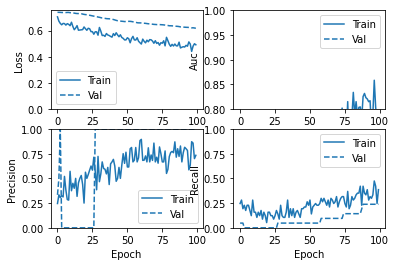

In [11]:
util.plot_metrics(non_resampled_history)

# Evaluate the Model

In [12]:
#test_y = test.pop('DEATH_EVENT')
#test_x = test
test_predictions_no_r = model.predict(test_x, batch_size=mobj.BATCH_SIZE)

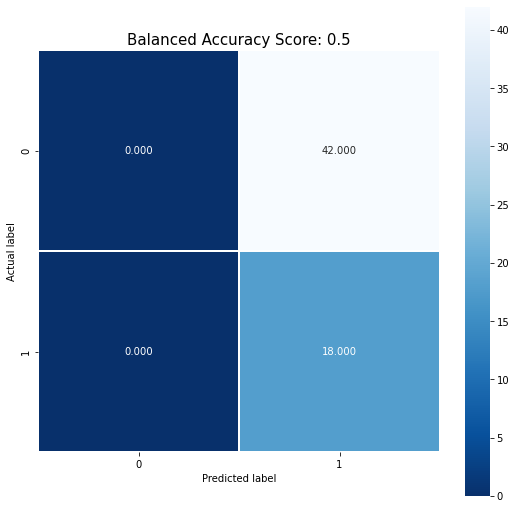

In [13]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

#print(test_y.shape)
#print(test_predictions_no_r.shape)
#print(test_predictions_no_r)

bscore_no_res = balanced_accuracy_score(test_y, keras.utils.to_categorical(test_predictions_no_r))

cm = confusion_matrix(test_y, keras.utils.to_categorical(test_predictions_no_r))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

In [14]:
no_res_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

loss :  0.47362897793451947
tp :  10.0
fp :  5.0
tn :  37.0
fn :  8.0
accuracy :  0.78333336
precision :  0.6666667
recall :  0.5555556
auc :  0.8273809



# UnderSampling (NearMiss1)

In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Apply Resampling to Dataset

In [17]:
from imblearn.under_sampling import NearMiss

raw_df = df.copy(deep=True)

y = raw_df.pop('DEATH_EVENT')
X = raw_df

nm1 = NearMiss(version=1)

X_resampled, y_resampled = nm1.fit_sample(X, y)

nm1_df = pd.DataFrame(X_resampled, columns=X.columns)
nm1_df['DEATH_EVENT'] = y_resampled
nm1_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
1,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
2,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
3,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82,0
4,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0


In [18]:
nm1_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,61.902781,0.432292,553.838542,0.432292,36.765625,0.385417,250004.951823,1.498490,136.062500,0.630208,0.307292,111.171875,0.500000
std,12.373282,0.496690,991.173962,0.496690,12.416518,0.487966,76715.286484,1.150881,4.806872,0.484010,0.462578,76.025049,0.501307
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,47000.000000,0.600000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,52.750000,0.000000,122.750000,0.000000,25.000000,0.000000,210750.000000,1.000000,134.000000,0.000000,0.000000,43.000000,0.000000
50%,60.000000,0.000000,249.500000,0.000000,35.000000,0.000000,254000.000000,1.180000,136.000000,1.000000,0.000000,94.500000,0.500000
75%,70.000000,1.000000,582.000000,1.000000,40.000000,1.000000,271000.000000,1.600000,139.000000,1.000000,1.000000,181.250000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,621000.000000,9.400000,146.000000,1.000000,1.000000,271.000000,1.000000


# Train/Test Split

In [19]:
train, test = train_test_split(nm1_df, test_size=0.2)

# Create New Model 

In [20]:
# Create Model 

import models

# set initial bias
neg, pos = np.bincount(nm1_df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1, bias = initial_bias)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# Normalize Data

In [21]:
# Normalize Data

train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

test_y = test.pop('DEATH_EVENT')
test_x = util.norm(test)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.363636,1.0,0.072085,1.0,0.696970,0.0,0.236136,0.080645,0.878788,0.0,0.0,0.108614
1,0.036364,0.0,0.010079,1.0,0.393939,0.0,0.313059,0.096774,0.818182,1.0,0.0,0.262172
2,0.600000,1.0,0.148252,0.0,0.393939,1.0,0.282648,0.048387,0.848485,0.0,0.0,0.782772
3,0.418182,1.0,0.062644,1.0,0.166667,1.0,0.343470,0.112903,0.636364,1.0,0.0,0.295880
4,0.090909,0.0,0.308625,1.0,0.242424,0.0,0.486583,0.080645,0.787879,1.0,0.0,0.468165


In [22]:
nm1_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2)

Train on 122 samples, validate on 31 samples
Epoch 1/100
122/122 [==============================] - 3s 21ms/sample - loss: 0.6846 - tp: 31.0000 - fp: 25.0000 - tn: 32.0000 - fn: 34.0000 - accuracy: 0.5164 - precision: 0.5536 - recall: 0.4769 - auc: 0.5543 - val_loss: 0.6975 - val_tp: 6.0000 - val_fp: 10.0000 - val_tn: 7.0000 - val_fn: 8.0000 - val_accuracy: 0.4194 - val_precision: 0.3750 - val_recall: 0.4286 - val_auc: 0.4454
Epoch 2/100
122/122 [==============================] - 0s 310us/sample - loss: 0.6816 - tp: 41.0000 - fp: 28.0000 - tn: 29.0000 - fn: 24.0000 - accuracy: 0.5738 - precision: 0.5942 - recall: 0.6308 - auc: 0.5876 - val_loss: 0.6956 - val_tp: 5.0000 - val_fp: 9.0000 - val_tn: 8.0000 - val_fn: 9.0000 - val_accuracy: 0.4194 - val_precision: 0.3571 - val_recall: 0.3571 - val_auc: 0.4538
Epoch 3/100
122/122 [==============================] - 0s 335us/sample - loss: 0.6890 - tp: 33.0000 - fp: 31.0000 - tn: 26.0000 - fn: 32.0000 - accuracy: 0.4836 - precision: 0.5156 - re

122/122 [==============================] - 0s 335us/sample - loss: 0.6500 - tp: 51.0000 - fp: 24.0000 - tn: 33.0000 - fn: 14.0000 - accuracy: 0.6885 - precision: 0.6800 - recall: 0.7846 - auc: 0.6893 - val_loss: 0.6488 - val_tp: 9.0000 - val_fp: 3.0000 - val_tn: 14.0000 - val_fn: 5.0000 - val_accuracy: 0.7419 - val_precision: 0.7500 - val_recall: 0.6429 - val_auc: 0.8046
Epoch 42/100
122/122 [==============================] - 0s 425us/sample - loss: 0.6484 - tp: 43.0000 - fp: 25.0000 - tn: 32.0000 - fn: 22.0000 - accuracy: 0.6148 - precision: 0.6324 - recall: 0.6615 - auc: 0.6934 - val_loss: 0.6477 - val_tp: 9.0000 - val_fp: 3.0000 - val_tn: 14.0000 - val_fn: 5.0000 - val_accuracy: 0.7419 - val_precision: 0.7500 - val_recall: 0.6429 - val_auc: 0.8130
Epoch 43/100
122/122 [==============================] - 0s 409us/sample - loss: 0.6473 - tp: 46.0000 - fp: 24.0000 - tn: 33.0000 - fn: 19.0000 - accuracy: 0.6475 - precision: 0.6571 - recall: 0.7077 - auc: 0.7038 - val_loss: 0.6467 - val_t

Epoch 81/100
122/122 [==============================] - 0s 397us/sample - loss: 0.5944 - tp: 48.0000 - fp: 20.0000 - tn: 37.0000 - fn: 17.0000 - accuracy: 0.6967 - precision: 0.7059 - recall: 0.7385 - auc: 0.7696 - val_loss: 0.5780 - val_tp: 13.0000 - val_fp: 5.0000 - val_tn: 12.0000 - val_fn: 1.0000 - val_accuracy: 0.8065 - val_precision: 0.7222 - val_recall: 0.9286 - val_auc: 0.9244
Epoch 82/100
122/122 [==============================] - 0s 368us/sample - loss: 0.5918 - tp: 46.0000 - fp: 21.0000 - tn: 36.0000 - fn: 19.0000 - accuracy: 0.6721 - precision: 0.6866 - recall: 0.7077 - auc: 0.7617 - val_loss: 0.5769 - val_tp: 13.0000 - val_fp: 5.0000 - val_tn: 12.0000 - val_fn: 1.0000 - val_accuracy: 0.8065 - val_precision: 0.7222 - val_recall: 0.9286 - val_auc: 0.9181
Epoch 83/100
122/122 [==============================] - 0s 352us/sample - loss: 0.5863 - tp: 49.0000 - fp: 23.0000 - tn: 34.0000 - fn: 16.0000 - accuracy: 0.6803 - precision: 0.6806 - recall: 0.7538 - auc: 0.7771 - val_loss:

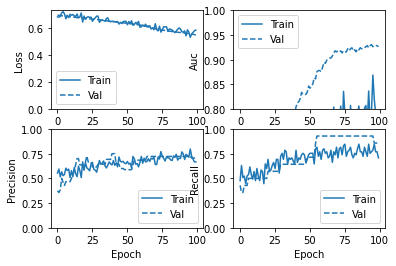

In [23]:
util.plot_metrics(nm1_resampled_history)

# Evaluate Model

loss :  0.47362897793451947
tp :  10.0
fp :  5.0
tn :  37.0
fn :  8.0
accuracy :  0.78333336
precision :  0.6666667
recall :  0.5555556
auc :  0.8273809



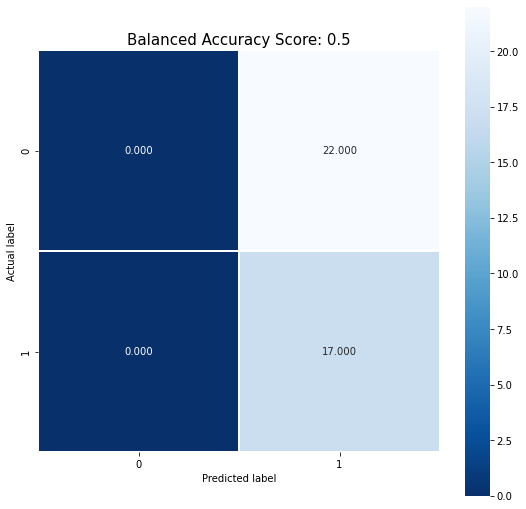

In [24]:
#test_y = test.pop('DEATH_EVENT')
#test_x = test

test_predictions_nm1 = model.predict(test_x, batch_size=mobj.BATCH_SIZE)


bscore_no_res = balanced_accuracy_score(test_y, keras.utils.to_categorical(test_predictions_nm1))


cm = confusion_matrix(test_y, keras.utils.to_categorical(test_predictions_nm1))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

nm1_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

# OneSidedSelection

In [25]:
raw_df = df.copy(deep=True)
raw_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Using batch generator from imbalanced learn

In [26]:
train, test = train_test_split(nm1_df, test_size=0.2)

In [27]:
# set initial bias
neg, pos = np.bincount(raw_df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

# Normalize Data

In [28]:
# Create Model
#y = train.pop('DEATH_EVENT')
#y_train = keras.utils.to_categorical(y, 3)
y_train =train.pop('DEATH_EVENT')
X_train = train
y_test =test.pop('DEATH_EVENT')
X_test = test
mobj = models.modelObj()
model = mobj.create_model(len(X.keys())-1, bias = initial_bias)

In [29]:
X_train = util.norm(X_train)
X_test = util.norm(X_test)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.363636,1.0,0.072085,1.0,0.696970,0.0,0.236136,0.080645,0.878788,0.0,0.0,0.108614
1,0.036364,0.0,0.010079,1.0,0.393939,0.0,0.313059,0.096774,0.818182,1.0,0.0,0.262172
2,0.600000,1.0,0.148252,0.0,0.393939,1.0,0.282648,0.048387,0.848485,0.0,0.0,0.782772
3,0.418182,1.0,0.062644,1.0,0.166667,1.0,0.343470,0.112903,0.636364,1.0,0.0,0.295880
4,0.090909,0.0,0.308625,1.0,0.242424,0.0,0.486583,0.080645,0.787879,1.0,0.0,0.468165


In [30]:
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import OneSidedSelection

# fit the model using generator
training_generator, steps_per_epoch = balanced_batch_generator(
    X_train, y_train, sampler=OneSidedSelection(random_state=0), batch_size=mobj.BATCH_SIZE, random_state=42)

callback_history_oss = model.fit_generator(generator=training_generator,
                                        steps_per_epoch=steps_per_epoch,
                                        epochs=mobj.EPOCHS, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


Using TensorFlow backend.


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  Matrix size-incompatible: In[0]: [32,12], In[1]: [11,16]
	 [[node sequential_2/dense_4/MatMul (defined at <ipython-input-30-1e5e047ca10f>:10) ]]
	 [[metrics/auc/assert_greater_equal/Assert/AssertGuard/pivot_f/_171/_201]]
  (1) Invalid argument:  Matrix size-incompatible: In[0]: [32,12], In[1]: [11,16]
	 [[node sequential_2/dense_4/MatMul (defined at <ipython-input-30-1e5e047ca10f>:10) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_32172]

Function call stack:
distributed_function -> distributed_function
